In [1]:
library(data.table)
library(tidyverse)
library(magrittr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()

In [2]:
odata <- fread("~/obesitydata.csv")

In [3]:
nrow(odata)

[1] 2111

In [4]:
odata %<>% mutate( bmi = Weight / Height ^2)

In [5]:
meanbmi <- mean(odata %>% select(bmi) %>% unlist %>% unname)

In [6]:
squared_deviance <- ((odata %>% select(bmi) %>%unlist %>%unname - meanbmi)) ^2

In [7]:
stdev <- sum(squared_deviance/nrow(odata))^0.5

In [8]:
odata %<>% mutate( z_bmi =( bmi - meanbmi) /stdev )

In [9]:
odata%>% select(z_bmi) %>% sapply(quantile) %>% t()

,0%,25%,50%,75%,100%
z_bmi,-2.085224,-0.6710029,-0.1224892,0.7886123,2.635839


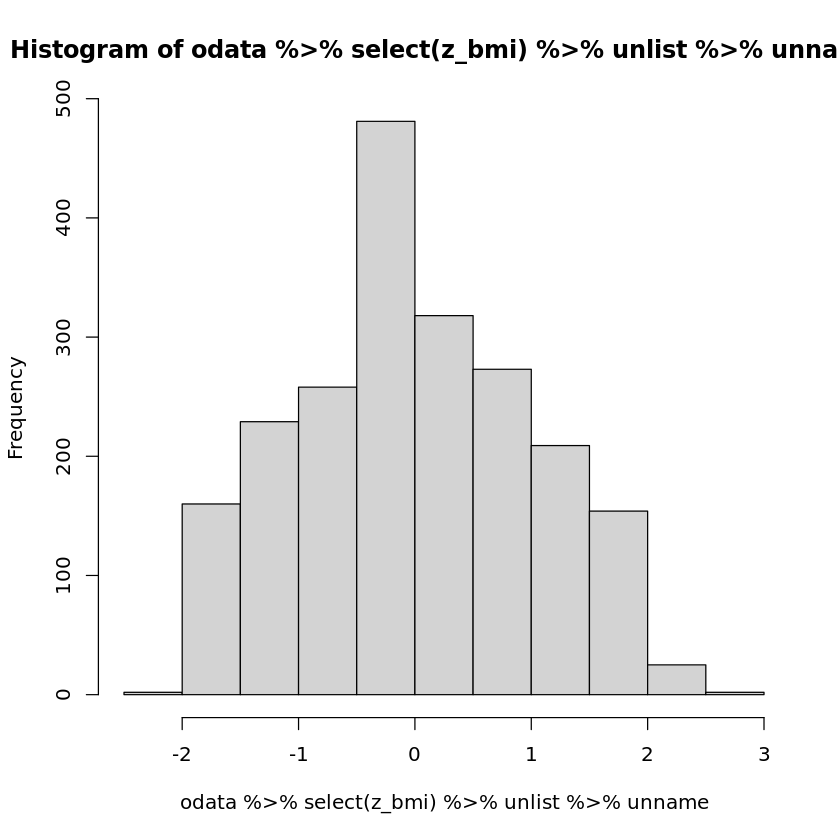

In [10]:
hist(odata %>% select(z_bmi)%>%unlist%>%unname)

In [11]:
odata %<>%  filter( z_bmi %between% c(-1.96,1.96))

In [12]:
nrow(odata)

[1] 2078

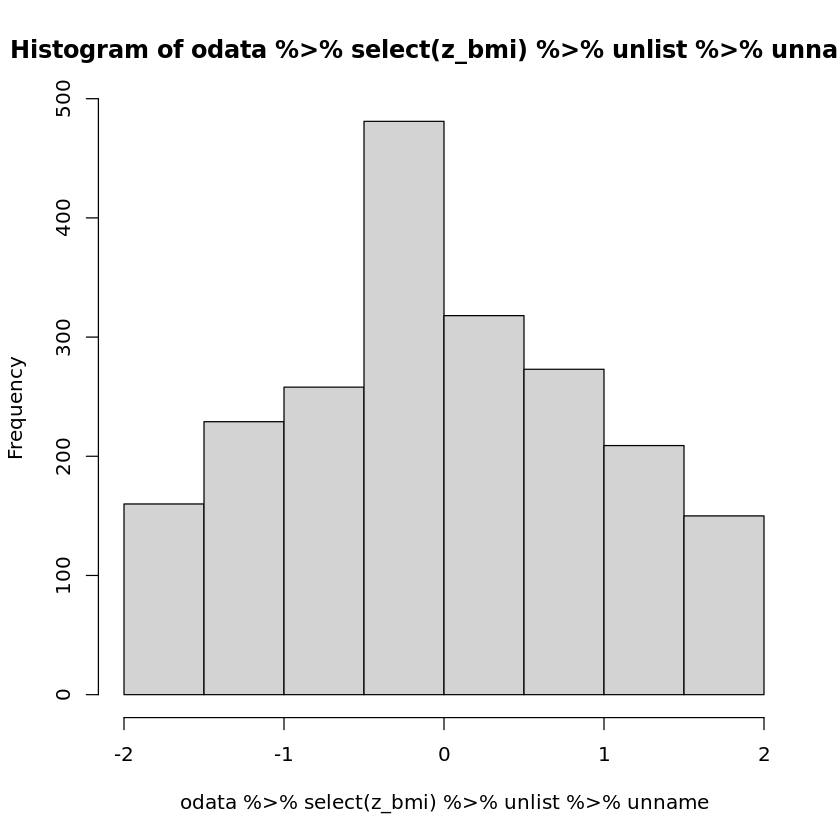

In [13]:
hist(odata %>% select(z_bmi)%>%unlist%>%unname)